# A8: Unsupervised Kmeans Clustering
### Khushbu Singh [ID: 989465248]                                              <span style="float:right;">11/05/2024</span>

# Table of Contents
1. [Importing Modules](#importing-modules)
2. [Loading the Data](#loading-the-data)
   - [Renaming Columns](#renaming-columns)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
   - [Summary Statistics](#summary-statistics)
   - [Gender Histogram](#gender-histogram)
   - [Age Histogram](#age-histogram)
   - [Dashboard](#dashboard)
4. [Data Preprocessing](#data-preprocessing)
   - [Customer Distribution Explanation](#customer-distribution-explanation)
5. [Optimal Number of Clusters using KMeans](#optimal-number-of-clusters-using-kmeans)
   - [Choosing the Optimal K](#choosing-the-optimal-k)
   - [Fitting the KMeans Model](#fitting-the-kmeans-model)
6. [Plotting Clusters](#plotting-clusters)
   - [Results](#results)
7. [KMeans Without Built-in Function](#kmeans-without-built-in-function)
   - [Applying Manual KMeans](#applying-manual-kmeans)
8. [Comparison of Built-in and Hardcoded KMeans](#comparison-of-built-in-and-hardcoded-kmeans)

### Importing Modules 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading the data

In [6]:
# Load the Mall Customers dataset to explore its contents

file_path = ('C:/Users/Khush/Python Analysis/Mall_Customers.csv')
mall_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure

mall_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Renaming Columns

In [8]:
# Renaming columns for better readability

mall_data.rename(columns={
    'CustomerID': 'CustomerID',
    'Gender': 'Gender',
    'Age': 'Age',
    'Annual Income (k$)': 'AnnualIncomeInK$',
    'Spending Score (1-100)': 'SpendingScore'
}, inplace=True)

# Display the first few rows to verify changes

mall_data.head()


,CustomerID,Gender,Age,AnnualIncomeInK$,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
print("Number of rows in the dataframe: ", len(mall_data.index))

Number of rows in the dataframe:  200


- Since the dataset contains only 200 rows, there's no need to worry about truncating the data. 
- The small size ensures that all the rows are easily manageable and visible without any need for limiting or hiding portions of the dataset. 
- This allows us to work with the entire dataset at once, simplifying analysis and ensuring no data is overlooked.

## Exploratory Data Analysis (EDA)

In [12]:
# Get summary statistics to understand the distribution of numerical columns
summary_stats = mall_data.describe()
print(summary_stats)

       CustomerID         Age  AnnualIncomeInK$  SpendingScore
count  200.000000  200.000000        200.000000     200.000000
mean   100.500000   38.850000         60.560000      50.200000
std     57.879185   13.969007         26.264721      25.823522
min      1.000000   18.000000         15.000000       1.000000
25%     50.750000   28.750000         41.500000      34.750000
50%    100.500000   36.000000         61.500000      50.000000
75%    150.250000   49.000000         78.000000      73.000000
max    200.000000   70.000000        137.000000      99.000000


#### The summary statistics for the dataset provide insights into the key features:

- Age: The average age is around 39, with a minimum of 18 and a maximum of 70 years.
- Annual Income (k dollors): Ranges from \$15,000 to \$137,000, with a mean of \$60,560.
- Spending Score (1-100): Ranges from 1 to 99, with an average of 50.2.


In [14]:
# Checking for missing values
missing_values = mall_data.isnull().sum()
print(missing_values)

CustomerID          0
Gender              0
Age                 0
AnnualIncomeInK$    0
SpendingScore       0
dtype: int64


There are no missing values in the dataset, and the **Gender** column has two unique categories: 'Male' and 'Female'.

In [16]:
# Displaying the unique values in the Gender column to understand its categories
unique_genders = mall_data['Gender'].unique()
print(unique_genders)

['Male' 'Female']


#### Gender Histogram

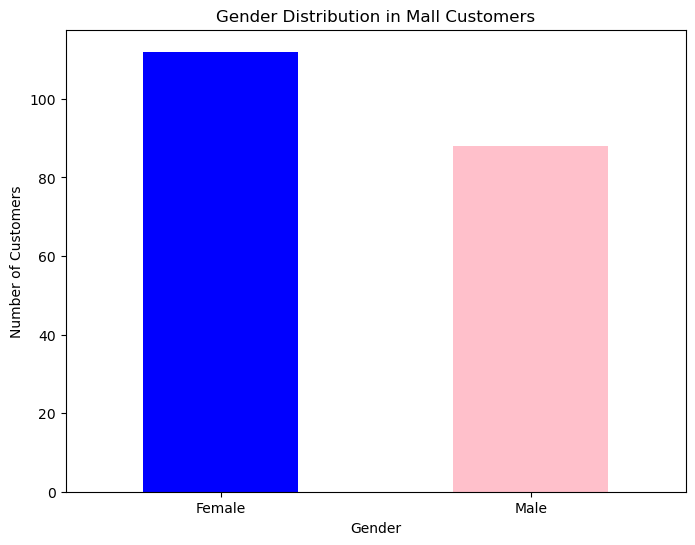

In [18]:
# Counting the occurrences of each gender
gender_counts = mall_data['Gender'].value_counts()

# Plotting the histogram
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution in Mall Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


#### Age histogram

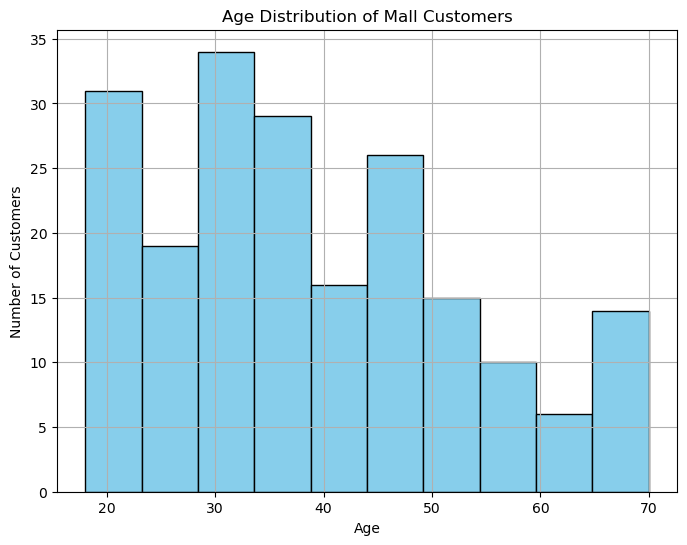

In [20]:
# Plotting a histogram for age distribution
plt.figure(figsize=(8, 6))
plt.hist(mall_data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

#### Dashboard

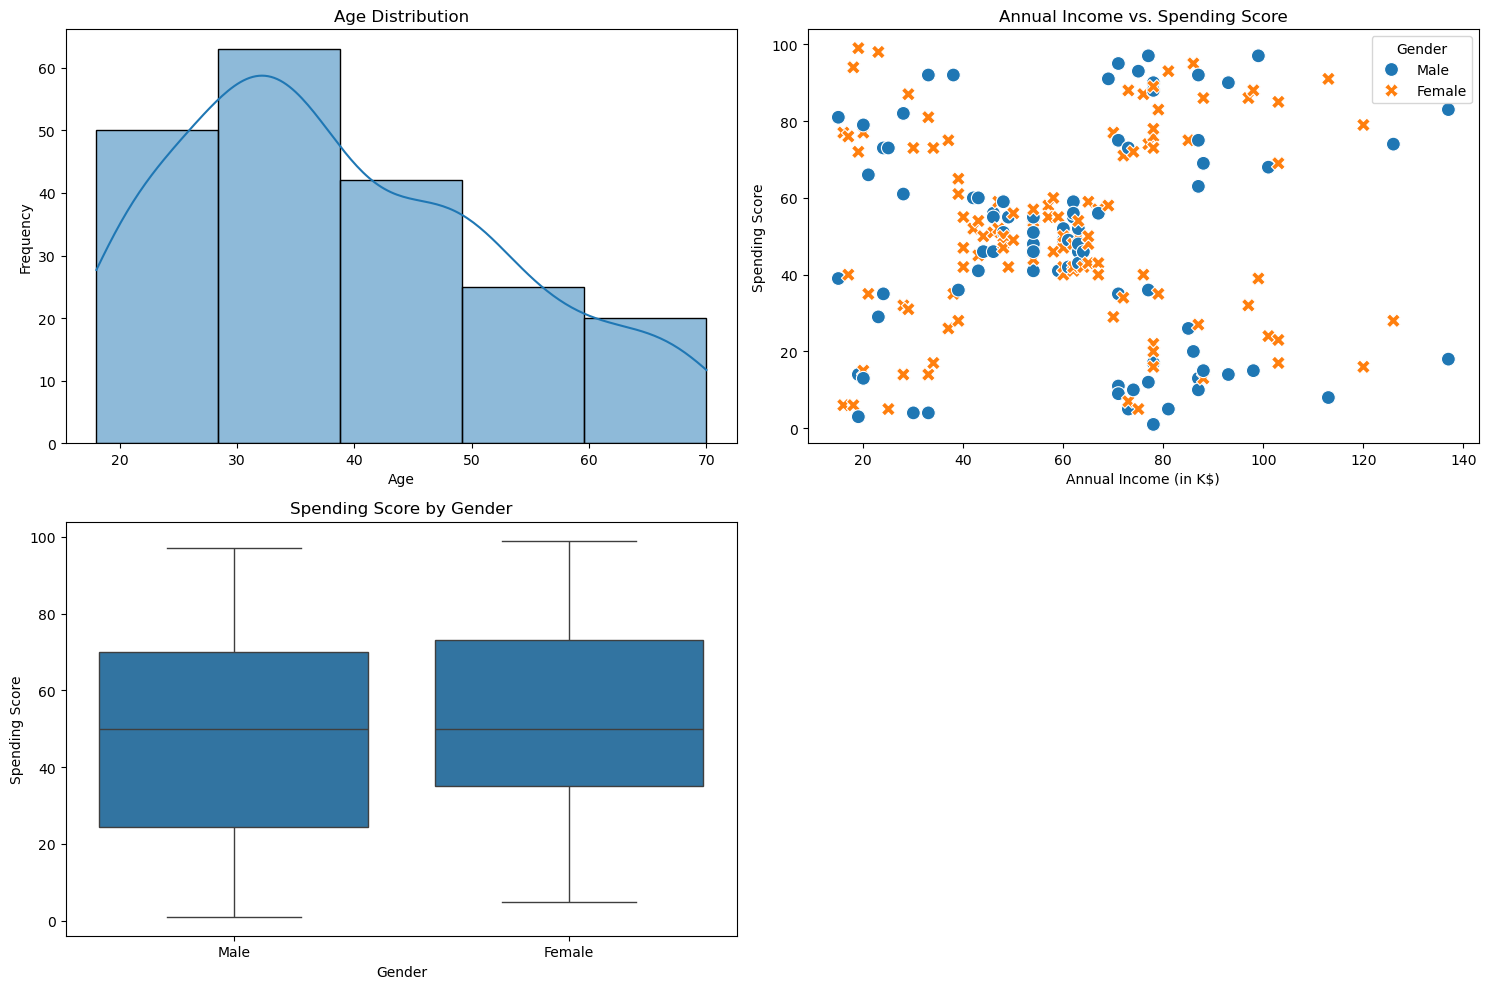

In [22]:
# Set up the dashboard
plt.figure(figsize=(15, 10))

# Plot 1: Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(mall_data['Age'], bins=5, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot 2: Annual Income vs. Spending Score
plt.subplot(2, 2, 2)
sns.scatterplot(data=mall_data, x='AnnualIncomeInK$', y='SpendingScore', hue='Gender', style='Gender', s=100)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (in K$)')
plt.ylabel('Spending Score')

# Plot 3: Spending Score Distribution by Gender
plt.subplot(2, 2, 3)
sns.boxplot(x='Gender', y='SpendingScore', data=mall_data)
plt.title('Spending Score by Gender')
plt.ylabel('Spending Score')

# Adjust layout
plt.tight_layout()
plt.show()


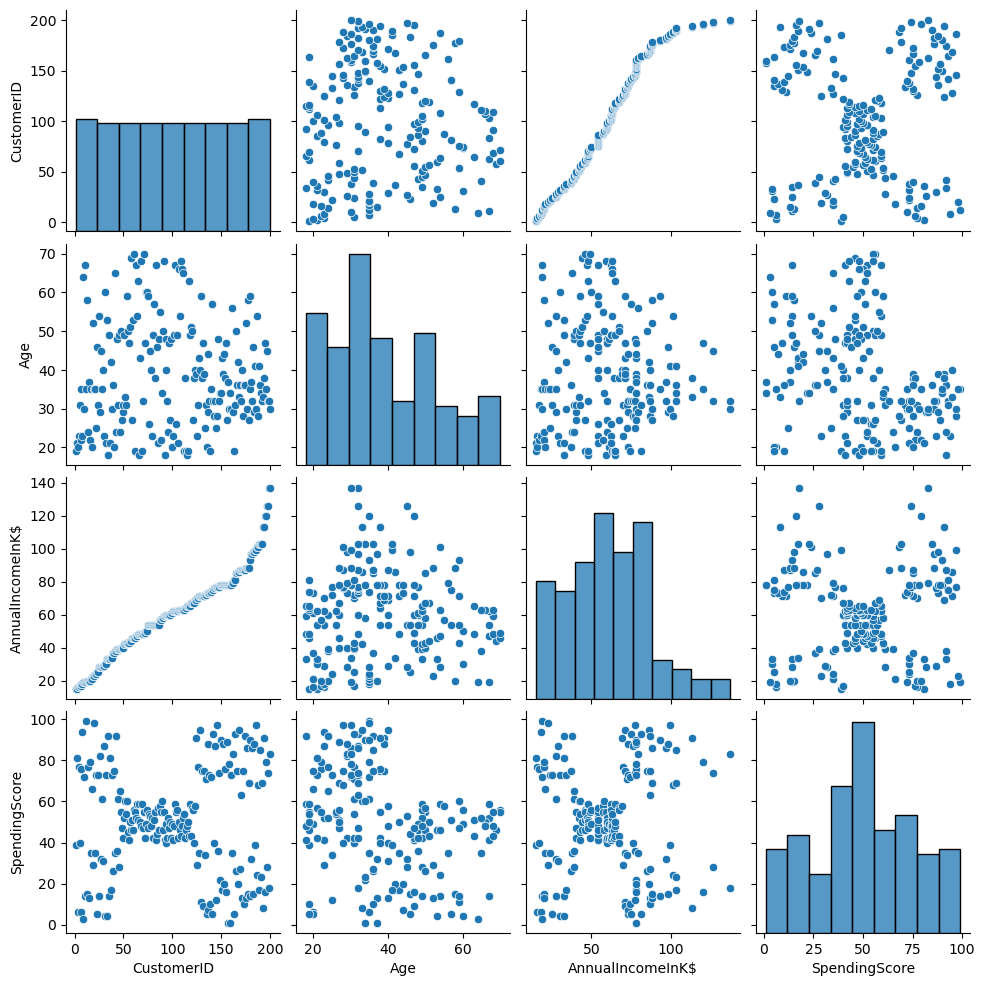

In [23]:
# Visualizing relationships between numerical features
sns.pairplot(mall_data)
#plt.show()

## Preprocessing the data

- In this I'll focus on preprocessing the data, specifically selecting the relevant features for clustering and scaling them if necessary. 
- Gender will be excluded since we're clustering based on spending habits and income, not demographics.

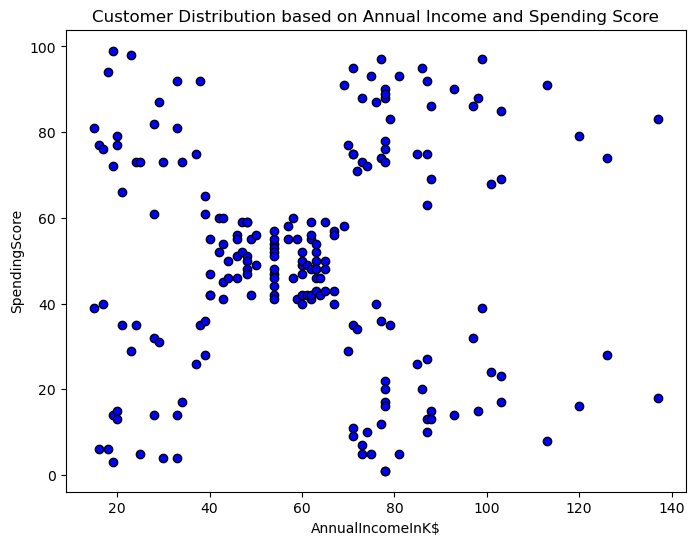

In [26]:
# I will focus on clustering based on "Annual Income" and "Spending Score" as they are directly related to customer spending behavior
# Select relevant features
X = mall_data[['AnnualIncomeInK$', 'SpendingScore']]

# No need for scaling in KMeans as the features are already in a comparable range, but we could standardize if desired

# Visualize the distribution of the data points for exploratory purposes

plt.figure(figsize=(8, 6))
plt.scatter(X['AnnualIncomeInK$'], X['SpendingScore'], c='blue', marker='o', edgecolor='k')
plt.title('Customer Distribution based on Annual Income and Spending Score')
plt.xlabel('AnnualIncomeInK$')
plt.ylabel('SpendingScore')
plt.show()

### Explanation of Customer Distribution based on Annual Income and Spending Score
- The scatter plot shows the distribution of customers based on their Annual Income and Spending Score. There appears to be some natural grouping, which suggests that clustering could help identify different segments of customers.
- No need for scaling in KMeans as the features are already in a comparable range. 

## Optimal Number of Clusters using the Elbow Method
I'll use the KMeans algorithm to group the customers into clusters. I'll start by determining the optimal number of clusters using the elbow method and then plot the final clusters

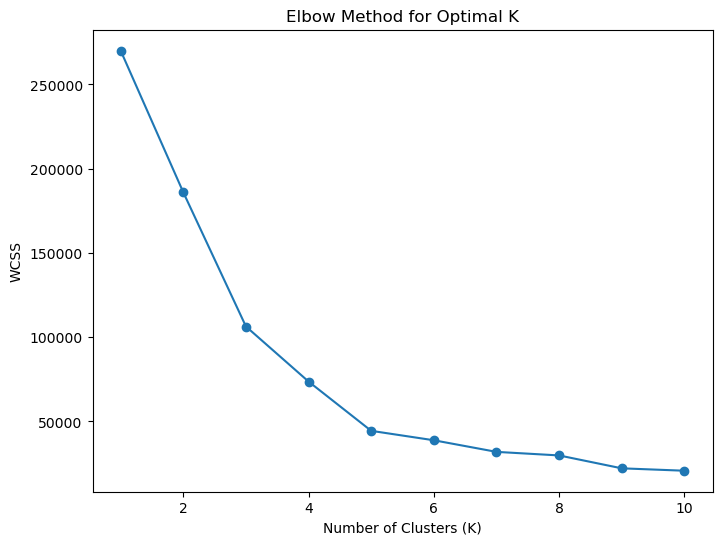

In [29]:
from sklearn.cluster import KMeans
# Supress warnings
# C:\Users\Khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
import warnings
warnings.filterwarnings('ignore')

# Elbow Method
wcss = []

# Trying out different values of K (number of clusters) from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # Inertia represents the WCSS

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

#### Choose the Optimal K

- Based on the plotted results, we select \( K = 5 \) as the optimal number of clusters. The "elbow" in the graph occurs at this point, where the rate of decrease in within-cluster variance starts to taper off significantly.
- Beyond \( K = 5 \), further increases in \( K \) yield only minor improvements, indicating diminishing returns.
- This pattern suggests that five clusters provide the best balance between compactness within clusters and meaningful separation among them.

## Fitting the Kmeans Model
After determining the optimal K from the elbow method (K=5), you fit the KMeans model to your data

In [33]:
# Fitting the KMeans model with the chosen number of clusters
num_clustors = 5;
kmeans = KMeans(n_clusters=num_clustors, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(X)

# Adding cluster labels to the dataset
X['Cluster'] = clusters

## Plotting clusters

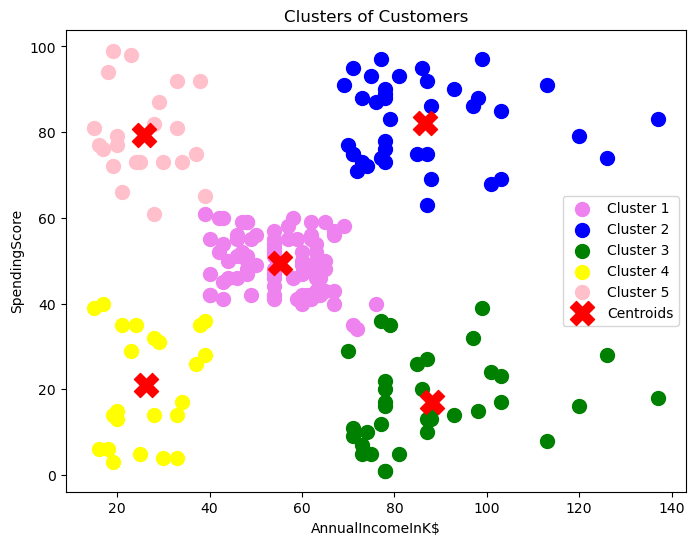

In [35]:
# Plotting clusters
plt.figure(figsize=(8, 6))

colors = ['violet', 'blue', 'green', 'yellow', 'pink']
# Plot each cluster with a different color
for i in range(num_clustors):
    plt.scatter(X.loc[X['Cluster'] == i, 'AnnualIncomeInK$'], X.loc[X['Cluster'] == i, 'SpendingScore'], 
            s=100, c=colors[i], label='Cluster ' + str(i + 1))

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroids')

# Adding title and labels
plt.title('Clusters of Customers')
plt.xlabel('AnnualIncomeInK$')
plt.ylabel('SpendingScore')
plt.legend()
plt.show()

#### Results
- The scatter plot visualizes five clusters of customer data, where each color represents a unique group of customers with similar characteristics.
- The x-axis shows annual income in thousands of dollars, and the y-axis displays the spending score, indicating how much customers spend relative to others.
- Each group of points forms a cluster, labeled from 1 to 5, and the red "X" markers represent the centroids for each cluster.
- These centroids are the average positions of each cluster and serve as the central points around which the data in each cluster is grouped.
- This clustering pattern shows clear groupings based on income and spending behavior.
- By separating customers into clusters, this analysis helps in identifying customer segments that could benefit from tailored marketing strategies or other targeted approaches.

In summary, the data has been divided into five distinct clusters, each centered around a specific spending and income profile, providing insights into customer behaviors and preferences.ences.

## Kmean without Built in Function

In [38]:
# Step 1: Random initialization of K centroids
def initialize_centroids(X, K):
    return X[np.random.choice(X.shape[0], K, replace=False)]

# Step 2: Assign each point to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Step 3: Update centroids
def update_centroids(X, clusters, K):
    return np.array([X[clusters == k].mean(axis=0) for k in range(K)])

# Step 4: Calculate WCSS
def calculate_wcss(X, centroids, clusters):
    wcss = 0
    for k in range(len(centroids)):
        cluster_points = X[clusters == k]
        wcss += np.sum((cluster_points - centroids[k]) ** 2)
    return wcss

# Step 5: KMeans algorithm with WCSS
def kmeansLocal(X, K, max_iters=1000):
    centroids = initialize_centroids(X, K)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, K)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    # After the final iteration, calculate WCSS
    wcss = calculate_wcss(X, centroids, clusters)
    
    return centroids, clusters, wcss

- In this custom K-means function, we start by randomly selecting \( K \) initial centroids from the data. Each data point is then assigned to the nearest centroid, forming clusters.
- Next, we update the centroids by calculating the mean of all points within each cluster. This process repeats until the centroids no longer change or the maximum number of iterations is reached.
- Finally, we calculate the within-cluster sum of squares (WCSS) to assess the compactness of clusters.

## Apply the manual KMeans

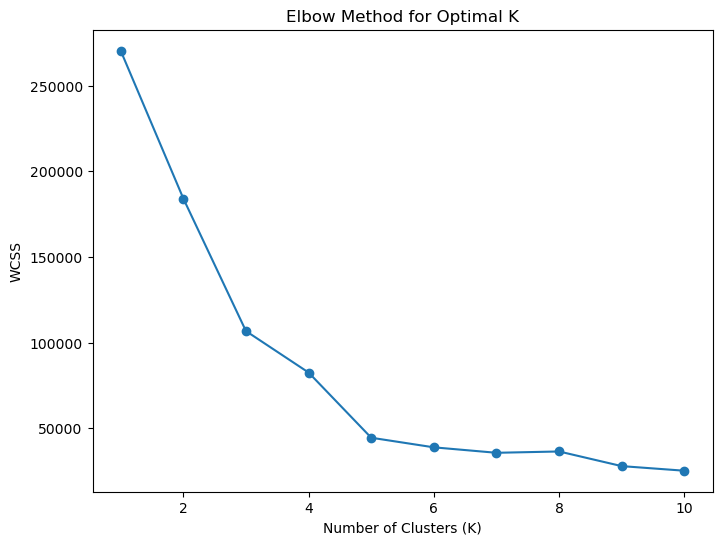

In [41]:
# Elbow Method
wcss = []
centroids = []
clustors = []
for k in range(1, 11):
    centroids_, clusters_, wcss_ = kmeansLocal(X.values, k)
    wcss.append(wcss_)
    centroids.append(centroids_)
    clustors.append(clusters_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

- Based on the plotted results, we select \( K = 5 \) as the optimal number of clusters. The "elbow" in the graph occurs at this point, where the rate of decrease in within-cluster variance starts to taper off significantly.
- Beyond \( K = 5 \), further increases in \( K \) yield only minor improvements, indicating diminishing returns.
- This pattern suggests that five clusters provide the best balance between compactness within clusters and meaningful separation among them.

In [43]:
# Adding cluster labels to the dataset
K = 5
X['ClusterLocal'] = clustors[K-1]
clustor_centroids = centroids[K-1]

## Plotting clusters

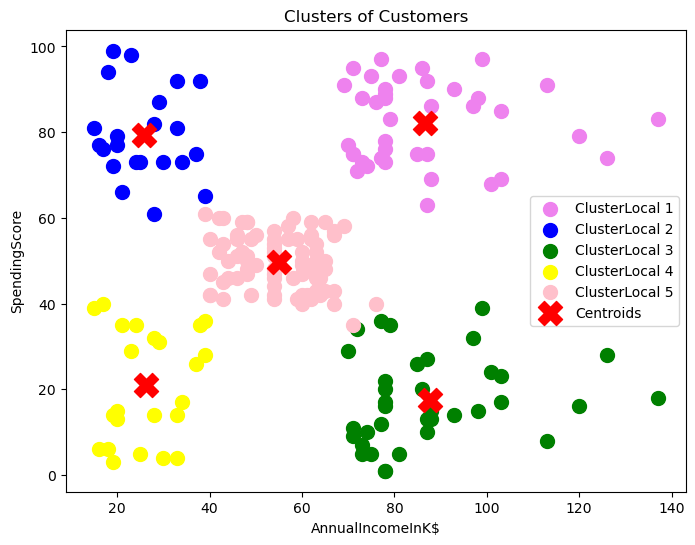

In [45]:
# Plotting cluster
plt.figure(figsize=(8, 6))

colors = ['violet', 'blue', 'green', 'yellow', 'pink']
# Plot each cluster with a different color
for i in range(K):
    plt.scatter(X.loc[X['ClusterLocal'] == i, 'AnnualIncomeInK$'], X.loc[X['ClusterLocal'] == i, 'SpendingScore'], 
            s=100, c=colors[i], label='ClusterLocal ' + str(i + 1))

# Plot cluster centroids
plt.scatter(clustor_centroids[:, 0], clustor_centroids[:, 1], 
            s=300, c='red', marker='X', label='Centroids')

# Adding title and labels
plt.title('Clusters of Customers')
plt.xlabel('AnnualIncomeInK$')
plt.ylabel('SpendingScore')
plt.legend()
plt.show()

#### Results
- The scatter plot visualizes five clusters of customer data, where each color represents a unique group of customers with similar characteristics.
- The x-axis shows annual income in thousands of dollars, and the y-axis displays the spending score, indicating how much customers spend relative to others.
- Each group of points forms a cluster, labeled from 1 to 5, and the red "X" markers represent the centroids for each cluster.
- These centroids are the average positions of each cluster and serve as the central points around which the data in each cluster is grouped.
- This clustering pattern shows clear groupings based on income and spending behavior.
- By separating customers into clusters, this analysis helps in identifying customer segments that could benefit from tailored marketing strategies or other targeted approaches.

In summary, the data has been divided into five distinct clusters, each centered around a specific spending and income profile, providing insights into customer behaviors and preferences.

# Comparison of Built-in and HardCoded(KmeansLocal)

In [48]:
X.head()

,AnnualIncomeInK$,SpendingScore,Cluster,ClusterLocal
0,15,39,3,3
1,15,81,4,1
2,16,6,3,3
3,16,77,4,1
4,17,40,3,3


To compare the clustering results from two different models (presumably using K-means clustering), where the results are stored in the Cluster and ClusterLocal columns of your DataFrame, you can analyze how the clusters from both models relate to each other. Here are a few steps you can take to perform this comparison:

#### Count the clusters
Summary of Clusters: Provide a count of how many data points fall into each cluster for both models.

In [51]:
# Count of clusters from both models
cluster_counts = pd.DataFrame({
    'Cluster': X['Cluster'].value_counts(),
    'ClusterLocal': X['ClusterLocal'].value_counts()
}).fillna(0).astype(int)

print(cluster_counts)


   Cluster  ClusterLocal
0       81            39
1       39            22
2       35            36
3       23            23
4       22            80


#### Cross-tabulation
Cross-tabulation: Create a cross-tabulation to see the distribution of Cluster against ClusterLocal.

In [53]:
# Cross-tabulation of Cluster vs. ClusterLocal
cross_tab = pd.crosstab(X['Cluster'], X['ClusterLocal'])
print(cross_tab)

ClusterLocal   0   1   2   3   4
Cluster                         
0              0   0   1   0  80
1             39   0   0   0   0
2              0   0  35   0   0
3              0   0   0  23   0
4              0  22   0   0   0
